# Figure S2: Non-specific ANI freezing

In [10]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
import pandas as pd
import scipy.io as sio
import pingouin as pg
from copy import copy, deepcopy

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd())
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot, FigMirror
import placefield_stability as pfs
import Placefields as pf
import discrimination as discr
import ca_traces as trc
import freezing_analysis as fa
from plotting import Fig, pretty_plot, FigMirror
from helpers import contiguous_regions
import covariance_analysis as cova

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
# Set up main figure plotting
%matplotlib ipympl
FigS2 = Fig(num=2, grid=(1, 2), size=(8.5, 6.5), fontsize=6)
print(FigS2.fig.get_size_inches())

[8.5 6.5]


### Plot all mice freezing in shock box at 0 and 24 hours for comparison purposes to ANI injected mice

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180419_1_openfield: nbadpts = 13 max_in_a_row = 5
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180816_1_openfield: nbadpts = 953 max_in_a_row = 156
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181128_1_openfield: nbadpts = 50 max_in_a_row = 12


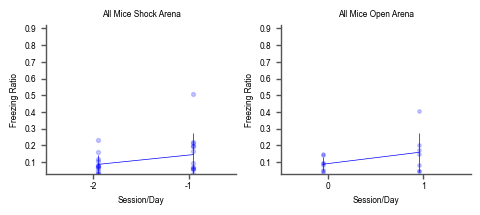

In [72]:
# fig, ax = plt.subplots(1, 2, figsize=(12, 4.5), sharey=True)
ax1 = FigS2.subplot(441)
ax2 = FigS2.subplot(442)
plt.rcParams['lines.linewidth'] = 0.5
_, _, all_mice_shock_frz = er.plot_all_freezing(err.all_mice_good, arenas=["Shock"], days=[-2, -1], ax=ax1, s=8)
# ax1.set_xticks((-2, -1))
ax1.set_xticks((0, 1))
ax1.set_xticklabels(("-2", "-1"))
ax1.set_title('All Mice Shock Arena')
er.plot_all_freezing(err.control_mice_good, arenas=["Open"], days=[0, 1], ax=ax2, s=6)
ax2.set_title('All Mice Open Arena')
[a.set_ylim((0.03, 0.92)) for a in (ax1, ax2)];
[a.set_yticks(np.arange(1,10,1)/10) for a in (ax1, ax2)];
FigS2.fig
FigS2.savefig

In [62]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': '#545454',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
 

In [45]:
np.arange(1,10,1)/10

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [29]:
all_mice_shock_frz.squeeze().shape
frz_df = pd.DataFrame({"-2": all_mice_shock_frz.squeeze()[0, :], "-1": all_mice_shock_frz.squeeze()[1, :]})
frz_df

,-2,-1
0,0.159394,0.093500
1,0.067231,0.213268
2,0.082814,0.073464
3,0.105521,0.195013
4,0.029831,0.062778
5,0.075245,0.193678
6,0.048531,0.061443
7,0.231968,0.507569
8,0.070347,0.008905
9,0.033393,0.029386


In [73]:
FigS2.savefig(Path('/Users/nkinsky/Documents/BU/Working/Eraser/plots/FigS2'), scriptname='FigureS2Notebook')

### Plot open field freezing for all mice 24 hours after injection

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180419_1_openfield: nbadpts = 13 max_in_a_row = 5
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180816_1_openfield: nbadpts = 953 max_in_a_row = 156
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181128_1_openfield: nbadpts = 50 max_in_a_row = 12


(0.0, 0.92)

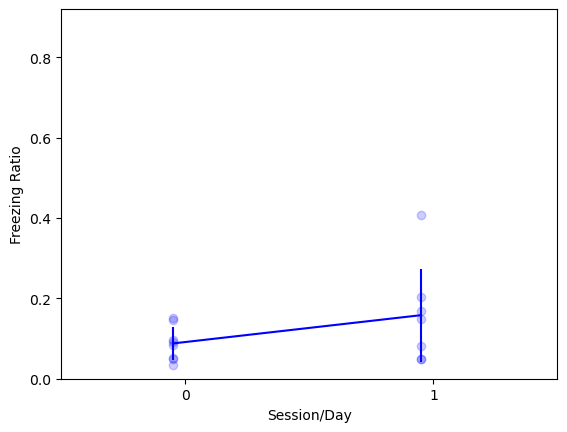

In [17]:
_, ax, _ = er.plot_all_freezing(err.control_mice_good, arenas=["Open"], days=[0, 1])
ax.set_ylim((0, 0.92))